<h1 style=text-align:center;color:brown;font:bold> Data PreProcessing </h1>

## Divided into 6 parts
    * Common Data preparation tasks
    * Data Cleaning
    * Feature Selection
    * Data Transformation
    * Feature engineering
    * Dimensionality Reduction

<h1 style=text-align:center;color:blue;font:bold> Data Cleaning </h1>

<h1 style=text-align:left;color:lime;font:bold> Basic Data Cleaning </h1>

What we will look for, in this notebook:
* How to identify and remove column variables that only have a single value
* How to identify and remove column variables that have less unique values
* How to identify and remove rows that contain duplicate observations

<html> 
<br>
<hr>
<br>
</html>

Dividing into seven parts :
1) Messy Datasets
2) Identify Columns That Contain a Single Value 
3) Delete Columns That Contain a Single Value 
4) Consider Columns That Have Very Few Values 
5) Remove Columns That Have A Low Variance 
6) Identify Rows that Contain Duplicate Data
7) Delete Rows that Contain Duplicate Data

In [1]:
DataPath = "/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/"
oilDataPath = "/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/oil-spill-dataset/"

#### Messy Datasets

In [2]:
# importing the dataset
import pandas as pd
df = pd.read_csv(oilDataPath + "oil-spill.csv", header=None)

#### Identify columns that contain a single value

In [3]:
# summarize the number of unique values each column has
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


#### Delete columns that contain a single value

In [4]:
print(df.shape)

(937, 50)


In [5]:
# get number of unique values for each column
counts = df.nunique()

In [6]:
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v==1]

In [7]:
print(to_del)

# drop these cols
df.drop(to_del, axis=1, inplace=True)

print(df.shape)

[22]
(937, 49)


#### Consider columns that have very few values

In [8]:
valPercentages = (df.nunique()/len(df))*100
print(valPercentages)

0      25.400213
1      31.696905
2      98.932764
3      99.573106
4      19.103522
5      40.021345
6      87.513340
7      65.955176
8      59.871932
9       6.083244
10     61.579509
11      6.296692
12      7.790822
13     11.419424
14      5.656350
15      9.711846
16     95.304162
17     86.446105
18     18.143010
19      5.656350
20      7.257204
21      0.960512
23      9.818570
24      0.960512
25      0.853789
26      0.960512
27     32.870864
28     47.705443
29     41.835646
30     11.419424
31      4.482391
32      0.426894
33      4.802561
34     15.048026
35     11.739594
36      0.320171
37     80.896478
38      0.960512
39      0.960512
40     41.408751
41     23.479189
42     68.729989
43     69.263607
44     53.255069
45      0.213447
46    100.000000
47     18.036286
48     30.522946
49      0.213447
dtype: float64


In [9]:
filterIndexes = [i for i,v in enumerate(valPercentages) if v<=1]

In [10]:
# drop the columns
df.drop(filterIndexes, axis=1, inplace=True)

In [11]:
df.shape

(937, 39)

#### Remove columns that have a low variance

Threshold : 0.0, Number of Features : 48
Threshold : 0.05, Number of Features : 37
Threshold : 0.1, Number of Features : 36
Threshold : 0.15000000000000002, Number of Features : 35
Threshold : 0.2, Number of Features : 35
Threshold : 0.25, Number of Features : 35
Threshold : 0.30000000000000004, Number of Features : 35
Threshold : 0.35000000000000003, Number of Features : 35
Threshold : 0.4, Number of Features : 35
Threshold : 0.45, Number of Features : 33
Threshold : 0.5, Number of Features : 31


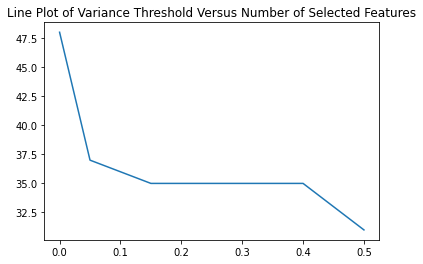

In [12]:
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
import matplotlib.pyplot as plt

df = pd.read_csv(oilDataPath + "oil-spill.csv", header=None)

# split data into data and outputs
X = df.values[:,:-1]
y = df.values[:,-1]

# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)

# Apply threshold with each transform
results = []
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print("Threshold : %s, Number of Features : %s"%(t,n_features))
    results.append(n_features)

# let us plot threshold vs features
plt.plot(thresholds,results)
plt.title("Line Plot of Variance Threshold Versus Number of Selected Features")
plt.show()

> We can see that even with a small threshold between 0.15 and 0.4, that a large number of features (14) are removed immediately

#### Identify rows that contain duplicate data

In [13]:
# calculated duplicates
dups = df.duplicated()

# report if there are any duplicates
print(dups.any())

# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Index: []

[0 rows x 50 columns]


#### Delete rows that contain duplicate data

In [14]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape)

(937, 50)


#### Combining everything

In [15]:
from sklearn.feature_selection import VarianceThreshold
oildf = pd.read_csv(oilDataPath + "oil-spill.csv",header=None)
print(oildf.shape)
uniquePercentages = round((oildf.nunique()/len(oildf))*100,2)
# print(uniquePercentages)
uniqueDel = [i for i,v in enumerate(uniquePercentages) if v<=1]
oildf.drop(uniqueDel,axis=1,inplace=True)
print(oildf.shape)
# divide the dataset
X = oildf.values[:,:-1]
y = oildf.values[:,-1]
transform = VarianceThreshold(threshold=0.4)
X_sel = transform.fit_transform(X)
print(X_sel.shape)
X_sel = pd.DataFrame(X_sel)
X_sel.drop_duplicates(inplace=True)
print(X_sel.shape)

(937, 50)
(937, 39)
(937, 28)
(937, 28)


<h1 style=text-align:left;color:lime;font:bold> Outlier identification and Removal </h1>

## Generate gaussian data

Generate a population 10,000 random numbers drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5. Numbers drawn from a Gaussian distribution will have outliers

In [16]:
from numpy.random import seed, randn
from numpy import mean,std

In [17]:
seed(123)
data = 5 * randn(10000) + 50
print(mean(data))
print(std(data))

50.04855946145798
4.990569272950737


### 1. Standard deviation method 

* $1\sigma$ - One standard deviation from the mean
* $2\sigma$ - Two standard deviation from the mean
* $3\sigma$ - Three standard deviation from the mean

Usually values that are falling outside of $3\sigma$ are considered to be rare events

In [18]:
data_mean, data_std = mean(data), std(data)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [19]:
# identify outliers
outliers = [ele for ele in data if ele < lower or ele > upper]
print(outliers)
print(len(data))
print(len(outliers))

[33.84472496040344, 67.85789609013156, 34.164723356735465, 30.993109015695044, 32.06253084392771, 34.66506183537667, 65.25377467361528, 33.780609791427395, 65.18939235776459, 31.57250396774399, 32.14878616211715, 33.99298019799369, 32.092630276170155, 66.5586729570232, 70.34048457417042, 67.79490650018748, 65.05485410262311, 33.419947916883544, 65.68112360428728, 34.42868345650997, 66.9305725933176, 67.84639830086067]
10000
22


In [20]:
# remove outliers
outliersRemovedData = [ele for ele in data if ele > lower and ele < upper]
print(len(outliersRemovedData))

9978


### 2. Interquartile range method

In [21]:
# redefine data
data = 5 * randn(10000) + 50

In [22]:
from numpy import quantile
q1 = quantile(data,0.25)
q2 = quantile(data,0.5)
q3 = quantile(data,0.75)
IQR = q3 - q1
print(IQR)

6.812502937842304


In [23]:
# calculate outlier cutoff
cutoff = 1.5 * IQR
lower = q1 - cutoff
upper = q3 + cutoff

In [24]:
outliers = [ele for ele in data if ele < lower or ele > upper]
print(len(outliers))

63


In [25]:
outliersRemovedData = [ele for ele in data if ele > lower and ele < upper]
print(len(data))
print(len(outliersRemovedData))

10000
9937


### 3. Automatic Outlier detection


A simple approach to identifying outliers is to locate those examples that are far from the other examples in the multi-dimensional feature space.

This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality. The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.

In [26]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

In [27]:
df = read_csv("./Datasets/Boston dataset/housing.csv", header = None)

In [28]:
data = df.values

In [29]:
# split into input and output
X = data[:,:-1]
y = data[:,-1]

In [30]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
yhat = lm.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, yhat)
print("MAE is %.2f" %mae)

MAE is 3.66


In [35]:
# identifying outliers
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [36]:
mask = yhat != -1

In [37]:
X_train, y_train = X_train[mask, :], y_train[mask]

In [38]:
lm.fit(X_train, y_train)
yhat = lm.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, yhat)
print("MAE is %.2f"%mae)

MAE is 3.85


<h1 style=text-align:left;color:lime;font:bold> How to Mark and Remove missing Data </h1>

In [8]:
from pandas import read_csv
from numpy import nan

In [2]:
# load the dataset
df = read_csv("./Datasets/Diabetes/pima-indians-diabetes.csv",header = None)

In [5]:
print(df.describe())
print(df.head())

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  3

In [7]:
num_missing = (df[[1,2,3,4,5]] == 0).sum()
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [10]:
# replace 0 with nan
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0,nan)
print(df.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [11]:
print(df.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

### Missing values can cause problems

Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.


In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
values = df.values
X = values[:,0:8]
y = values[:,8]

In [5]:
model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=3, shuffle = True, random_state = 123)

In [6]:
result = cross_val_score(model, X, y, cv = cv, scoring = "accuracy")
print(result)

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 553, in fit
    self.classes_ = unique_labels(y)
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 103, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([ 29780. ,  61900. ,   3340. ,  18030. ,   3660. ,   3720. ,
         1800. ,  25450. ,  17380. ,  15880. ,  58790. ,  12990. ,
        15420. ,  49430. ,  21180. ,  21570. ,  28160. ,  10920. ,
         7820. ,   9520. ,  18590. ,  29030. ,   5050. ,   8110. ,
        13520. ,   8280. ,  11170. ,  20830. ,   3440. ,   2370. ,
         5590. ,   8190. ,   3120. ,  12420. ,   2950. ,  15140. ,
         5360. ,   8010. ,   2030. ,   3850. ,   2140. ,   3610. ,
         2600. ,   2060. ,   3550. ,   5190. ,   3230. ,   3990. ,
         6730. ,   8800. ,   1760. ,   1540. ,   2000. ,   1830. ,
         1620. ,   3450. ,   7050. ,   2790. ,   4160. ,   8380. ,
         3370. ,   1990. ,   2480. ,   2230. ,   2540. ,   6340. ,
         6720. ,   3090. ,   3350. ,   2910. ,   5340. ,   1620. ,
         4480. ,   2570. ,   3430. ,   1280. ,   3400. ,   9080. ,
         1940. ,   2060. ,   5420. ,   3380. ,   2010. ,   2700. ,
         4260. ,   4320. ,   4030. ,   2490. ,   1540. ,   3700. ,
         2370. ,   5020. ,   2470. ,   1760. ,   3990. ,   2100. ,
         1890. ,   4620. ,   4430. ,   1800. ,   1490. ,   1980. ,
         1820. ,   1680. ,   1840. ,   2850. ,   1840. ,   6440. ,
         2650. ,   2110. ,   2860. ,   5080. ,   3620. ,   1680. ,
         2230. ,   3060. ,   2080. ,   2320. ,   2830. ,   2910. ,
         3720. ,   1940. ,   1760. ,   2230. ,   1770. ,   2260. ,
         2280. ,   1950. ,   1590. ,   2200. ,   1720. ,   1950. ,
         1830. ,   2450. ,  47220. ,  14040. , 160740. ,   3330. ,
         3150. ,   2450. ,   7430. ,   5000. ,   5200. ,  12830. ,
         6140. ,   2850. ,  20100. ,   2360. ,   2050. ,   2210. ,
         4410. ,   2210. ,   3660. ,   2960. ,   3660. ,   2960. ,
         5470. ,   1790. ,   4340. ,   2700. ,   6360. ,   3120. ,
         2570. ,   2060. ,   5880. ,   3140. ,   4650. ,   8630. ,
         5680. ,   7170. ,   2490. ,   1700. ,   2290. ,   4120. ,
         2790. ,   4340. ,   1850. ,   2800. ,   3000. ,   1630. ,
         2120. ,   2880. ,   3200. ,   1990. ,   1580. ,   2220. ,
         1770. ,   1930. ,   3690. ,   5590. ,   1890. ,   2190. ,
         1580. ,   2440. ,   2790. ,   2410. ,   2040. ,   1450. ,
         1300. ,   8940. ,   1290. ,   3080. ,   3740. ,   7140. ,
         3620. ,   1850. ,   1560. ,   2100. ,   5430. ,   1400. ,
         2710. ,   4390. ,   3090. ,   1430. ,   7440. ,  10070. ,
         3220. ,   5760. ,   2510. ,   4120. ,   3670. ,   2500. ,
         3640. ,   3360. ,   3110. ,   1990. ,   1320. ,   2020. ,
         1380. ,   5160. ,  15090. ,   3200. ,   3700. ,   1570. ,
         3390. ,   2770. ,   2860. ,   3170. ,   1710. ,   3920. ,
         5600. ,   1960. ,   4010. ,   1970. ,   2870. ,   2750. ,
         2120. ,   1380. ,   1560. ,   1630. ,   1530. ,   3160. ,
         2130. ,   2010. ,   2200. ,   2880. ,   2310. ,   2300. ,
         1520. ,   1850. ,   1730. ,   2940. ,   1780. ,   2990. ,
         2570. ,   1410. ,   2980. ,   3030. ,   2980. ,   1400. ,
         2510. ,   2000. ,   2600. ,   2110. ,   2250. ,   1530. ,
         1860. ,   2950. ,   2110. ,   1810. ,   1560. ,   2780. ,
         2120. ,   5340. ,  61516.5,  62250. ,  40540. ,  24066. ,
         2654.5,   2705. ,   1130. ,   6870.5,   7695.5,   2213.5,
        20632. ,   9433. ,   1551.5,   2291. ,   8536. ,   1962.5,
         1754.5,  10713. ,   2370. ,   3992.5,   2238. ,   2540.5,
         7091.5,   1227. ,   1255.5,   4716.5,   1386. ,   3430. ,
         1326.5,   3374.5,   1898. ,   2185. ,   2242. ,   1604.5,
         2582. ,   2145. ,   1677. ,   1370.5,   1701.5,   2275.5,
         2300. ,   1357.5,   1461. ,   1401.5,   1467.5,   1302. ,
         1298. ,  32401.5,  21289.5,   3483. ,   6797. ,   4580.5,
         7654. ,   7963. ,   2763. ,   4772.5,   4431. ,   3890.5,
         2822.5,  20563.5,   2539.5,   4524. ,   7499. ,   1277.5,
         2979. ,   8252.5,   2950.5,   2732. ,   2904. ,   1595.5,
         2948. ,   3149.5,   6361. ,   1829.5,   2167. ,   1741.5,
         3352.5,   1174. ,   2694.5,   1516.5,   2116.5,   2491.5,
         2163. ,   5003.5,   1929. ,   2350.5,   1598. ,   1651. ,
         2191.5,   1664. ,   2940. ,   1370.5,   1505. ,   1679.5,
         1227. ,   1264.5,   1311. ,  21569. ,  10041. ,   8770. ,
        11909. ,   8792. ,   4880. ,   1916. ,   2022. ,   2488. ,
         1953. ,   4748. ,   2255. ,   4605. ,   3705. ,   1498. ,
         1387. ,   3377. ,   3435. ,   3901. ,   3128. ,   2620. ,
         1154. ,   2276. ,   1731. ,   1064. ,   1027. ,   1535. ,
         1477. ,   1715. ,    831. ,   2477. ,   2080. ,   1461. ,
         1768. ,   1355. ,   1027. ,    974. ,    937. ,   1461. ,
          937. ,   1498. ,    937. ,    900. ,    884. ,   1138. ,
         1408. ,    831. ,    831. ,    778. ,    884. ,    937. ,
          794. ,    884. ,    831. ,    921. ,    831. ,    831. ,
          921. ,   4187. ,   3679. ,  16355. ,   1260. ,   9374. ,
        15254. ,   4626. ,   2885. ,   4420. ,   4192. ,   2583. ,
         6394. ,   5923. ,   2345. ,   1715. ,   2345. ,   1535. ,
         1334. ,    847. ,   1641. ,   1641. ,   2366. ,   2403. ,
         1694. ,   4642. ,   1371. ,    937. ,   1064. ,   1445. ,
          831. ,   1461. ,    974. ,   1191. ,    884. ,   1339. ,
         1212. ,    757. ,    974. ,   1011. ,   1011. ,   1027. ,
          757. ,   1191. ,   1011. ,    757. ,    778. ,   1339. ,
         1122. ,    868. ,    868. ,   1085. ,    704. ,  33541. ,
         6998. ,   4568. ,   4457. ,  15106. ,   9707. ,   2906. ,
         2705. ,   2419. ,   2472. ,   2022. ,   2075. ,   1916. ,
         1985. ,   1985. ,   4187. ,   1588. ,   2075. ,   2128. ,
         2456. ,   6362. ,   1821. ,   1895. ,   1805. ,   1281. ,
         1281. ,   2292. ,   2218. ,   2456. ,   1461. ,   2112. ,
         2186. ,   3340. ,   1768. ,   1318. ,   1228. ,   1551. ,
         1477. ,   1588. ,   2059. ,   1138. ,   1138. ,   1805. ,
          974. ,   1191. ,   1101. ,   1932. ,   1821. ,   1154. ,
         1191. ,    884. ,   1334. ,   1498. ,   1101. ,   1138. ,
         1191. ,   1191. ,   1011. ,   1752. ,   1498. ,    937. ,
         1064. ,   1154. ,   1228. ,   1768. ,    958. ,    921. ,
         1461. ,   1011. ,    974. ,   1461. ,    974. ,   1011. ,
         1408. ,   1011. ,    847. ,    884. ,   1101. ,   1445. ,
          974. ,   1302. ,   1027. ,    921. ,   1027. ,   1535. ,
         2043. ,    884. ,   1027. ,   1011. ,    847. ,   1138. ,
         1175. ,    810. ,   1064. ,    990. ,   1064. ,   1281. ,
         1011. ,    921. ,   1064. ,    974. ,   1101. ,    831. ,
          794. ,    794. ,    831. ,    794. ,    921. ,   1048. ,
         1228. ,    921. ,    667. ,    794. ,    794. ,    794. ,
          794. ,    794. ,    757. ,    831. ,    794. ,    868. ,
          794. ,    778. ,    831. ,   1159. ,    868. ,    704. ,
          884. ,    794. ,    868. ,    831. ,    831. ,    831. ]),)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 553, in fit
    self.classes_ = unique_labels(y)
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 103, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([ 3340. , 18030. ,  3350. ,  1570. ,  1810. ,  3720. ,  1850. ,
        1800. ,  4610. , 22110. , 17380. , 58790. , 12990. ,  2350. ,
        7720. ,  4730. ,  2480. ,  2370. ,  4800. ,  7120. ,  3120. ,
        2950. , 15140. ,  3010. ,  3570. ,  8010. ,  2870. ,  2030. ,
        3950. ,  2840. ,  3850. ,  3650. ,  2140. ,  2110. ,  3610. ,
        3150. ,  5190. ,  3990. ,  6730. ,  8800. ,  1830. ,  1490. ,
        1580. ,  1620. ,  3450. ,  7640. ,  3190. ,  1880. ,  4160. ,
        3600. ,  3370. ,  1990. ,  2480. ,  4050. ,  3780. ,  2540. ,
        6230. ,  3090. ,  2740. ,  3350. ,  2910. ,  4400. ,  3440. ,
        2220. ,  2570. ,  3800. ,  3430. ,  1280. ,  3700. ,  3400. ,
        9080. ,  1940. ,  2500. ,  5270. ,  2090. ,  4320. ,  1540. ,
        5020. ,  2470. ,  2860. ,  4860. ,  2180. ,  3990. ,  2100. ,
        1890. ,  3510. ,  4620. ,  4430. ,  1800. ,  1980. ,  2660. ,
        1680. ,  1940. ,  2850. ,  1970. ,  4920. ,  1840. ,  2650. ,
        2210. ,  5080. ,  1900. ,  2380. ,  2510. ,  2610. ,  2510. ,
        2080. ,  1790. ,  1850. ,  2540. ,  2830. ,  1940. ,  1750. ,
        2090. ,  2230. ,  1270. ,  2240. ,  1880. ,  2280. ,  1950. ,
        2160. ,  1830. ,  2450. , 22260. ,  7780. , 47220. , 14040. ,
       31760. ,  9170. , 37960. , 13830. ,  2450. ,  7430. ,  5000. ,
       15780. ,  5390. ,  6140. ,  2850. , 20100. ,  2210. ,  2210. ,
        3970. ,  3660. ,  3660. ,  2960. ,  3020. ,  3600. ,  2880. ,
        5830. ,  9040. ,  6440. ,  5830. ,  7320. ,  6360. ,  4460. ,
        8700. ,  5880. ,  2410. ,  4650. ,  2760. ,  7170. ,  3010. ,
        2490. ,  4560. ,  1700. ,  4120. ,  4340. ,  6210. ,  1930. ,
        1850. ,  3010. ,  3000. ,  1400. ,  1900. ,  2750. ,  2730. ,
        2120. ,  4030. ,  3420. ,  1840. ,  2460. ,  1960. ,  2130. ,
        1580. ,  1940. ,  1580. ,  1530. ,  2790. ,  2340. ,  2040. ,
        1180. ,  1360. ,  2000. ,  1300. ,  2700. ,  1290. ,  3080. ,
        3610. ,  2680. ,  1560. ,  4350. ,  1940. ,  2100. ,  2140. ,
        2560. ,  6040. ,  5430. ,  2710. ,  4390. ,  3090. ,  1430. ,
        7440. ,  2880. ,  6980. ,  1330. ,  3220. ,  2450. ,  3640. ,
        4290. ,  3360. ,  3110. ,  1990. ,  1320. ,  2970. ,  1870. ,
        1850. ,  2130. ,  2190. ,  5160. ,  3040. ,  2790. ,  1500. ,
       15090. ,  3200. ,  1570. ,  3390. ,  2770. ,  2860. ,  2000. ,
        3920. ,  5600. ,  3280. ,  1650. ,  2000. ,  2580. ,  4010. ,
        1650. ,  1430. ,  1460. ,  3730. ,  3410. ,  1970. ,  2120. ,
        1560. ,  1630. ,  4750. ,  1530. ,  1580. ,  1550. ,  1870. ,
        2130. ,  1410. ,  2200. ,  2880. ,  1410. ,  1430. ,  1730. ,
        1850. ,  2990. ,  2470. ,  2570. ,  2980. ,  3030. ,  2980. ,
        1400. ,  1810. ,  2250. ,  1530. ,  1860. ,  1720. ,  2950. ,
        2110. ,  1810. ,  1910. ,  2100. ,  2780. ,  2180. ,  1430. ,
        1760. ,  2120. ,  5340. , 61516.5, 40540. ,  2654.5,  1130. ,
        6870.5,  7695.5,  8684.5,  3339.5,  4857.5, 25038. ,  2291. ,
       10852.5,  1962.5,  1664. ,  3593. ,  2370. ,  3992.5,  6111.5,
        3511.5,  2540.5,  7091.5,  1227. ,  1255.5,  5160. ,  3430. ,
        1326.5,  3374.5,  2185. ,  2275.5,  2145. ,  1677. ,  2275.5,
        1489.5,  2300. ,  2628.5,  1357.5,  1461. ,  1401.5,  1167.5,
        1302. ,  1298. , 32401.5, 21289.5,  3483. , 54863.5,  7654. ,
        7963. ,  2763. ,  4772.5,  9341.5,  4431. ,  3890.5,  2539.5,
        4070. ,  7499. ,  2979. ,  8252.5,  4531.5,  2732. ,  2167. ,
        3352.5,  3423.5,  3474. ,  2489. ,  1829.5,  2893.5,  1174. ,
        1516.5,  1783. ,  2116.5,  2491.5,  1710.5,  1752. ,  5003.5,
         986.5,  1642. ,   880.5,  1258. ,  1651. ,  1845. ,  1492. ,
        2191.5,  2381.5,  1664. ,  1845. ,  2940. ,  1198.5,  1505. ,
        1145.5,  1492. , 21569. , 10041. , 11909. ,  8792. ,  4880. ,
        1916. ,  2022. ,  4748. ,  6336. ,  4605. ,  3705. ,  4155. ,
        1969. ,  3377. ,  1625. ,  3128. ,  2403. ,  1154. ,  2276. ,
        2419. ,  1805. ,  2038. ,  1064. ,  1535. ,  1535. ,  2768. ,
         831. ,  2477. ,  1461. ,  1768. ,  1191. ,  1027. ,   810. ,
        1101. ,  1498. ,   937. ,  1027. ,  1191. ,   900. ,   884. ,
        1138. ,  1408. ,   831. ,  1085. ,   778. ,   884. ,   937. ,
        1117. ,   794. ,   884. ,   778. ,   905. ,   831. ,   921. ,
         921. ,  7067. ,  4187. ,  9294. ,  3679. ,  5219. ,  2885. ,
        1858. ,  4192. ,  1482. ,  1445. ,  5362. ,  2583. ,  1498. ,
        1244. ,  3864. ,  1461. ,  1715. ,  2530. ,  3054. ,  1392. ,
        1101. ,  1334. ,   847. ,  1080. ,  2403. ,   868. ,  2477. ,
        1228. ,  1027. ,  1064. ,  1461. ,   974. ,  1625. ,   974. ,
         847. ,  1138. ,  1339. ,  1699. ,   847. ,  1191. ,  1355. ,
         974. ,  2387. ,  1011. ,  1027. ,  1191. ,   720. ,   778. ,
         757. ,   704. ,  6998. ,  4277. ,  4457. ,  2705. ,  2419. ,
        2292. ,  2022. ,  1985. ,  2435. ,  2435. ,  2218. ,  2292. ,
        1731. ,  4187. ,  2165. ,  1641. ,  1715. ,  1588. ,  2128. ,
        6362. ,  1821. ,  1895. ,  5944. ,  1805. ,  1752. ,  1408. ,
        1281. ,  1858. ,  1768. ,  1191. ,  1461. ,  1461. ,  2186. ,
        1281. ,  1551. ,  1461. ,  1228. ,  1551. ,  2059. ,  1588. ,
        1138. ,  1805. ,  1101. ,  1101. ,  1154. ,  1535. ,  1768. ,
        1821. ,  1281. ,  1191. ,   884. ,   884. ,   921. ,  1662. ,
        1334. ,  1371. ,  1498. ,  1191. ,  1011. ,  1752. ,  1498. ,
        1064. ,  1228. ,  1228. ,   958. ,   921. ,  2059. ,  1461. ,
         974. ,  1858. ,   847. ,  1101. ,  1371. ,  1371. ,  1461. ,
        1191. ,   974. ,  1011. ,  1408. ,  1355. ,   884. ,   847. ,
         884. ,  1101. ,  1064. ,  1011. ,  1445. ,  1318. ,   868. ,
        1302. ,   921. ,  1101. ,   810. ,  1027. ,  1191. ,  1027. ,
        1011. ,   847. ,  1228. ,  1175. ,  1392. ,  1572. ,  1027. ,
         810. ,  1064. ,  1281. ,  1011. ,   810. ,   921. ,  1101. ,
         831. ,   921. ,   794. ,   794. ,   794. ,   847. ,   831. ,
         794. ,   921. ,  1048. ,  1228. ,   847. ,   974. ,   831. ,
         794. ,   831. ,   794. ,   794. ,   794. ,   868. ,   741. ,
         831. ,   884. ,   868. ,   958. ,   884. ,   831. ,   847. ,
         831. ,   831. ]),)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 553, in fit
    self.classes_ = unique_labels(y)
  File "/Users/manideepbangaru/Documents/EDAnMLApply/.mlenv/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 103, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([ 29780. ,  61900. ,   3350. ,   1570. ,   3660. ,   1810. ,
         1850. ,   4610. ,  25450. ,  22110. ,  15880. ,  15420. ,
        49430. ,  21180. ,  21570. ,  28160. ,  10920. ,   7820. ,
         9520. ,  18590. ,  29030. ,   2350. ,   5050. ,   8110. ,
         7720. ,  13520. ,   8280. ,  11170. ,   4730. ,   2480. ,
        20830. ,   3440. ,   5590. ,   4800. ,   8190. ,   7120. ,
        12420. ,   3010. ,   5360. ,   3570. ,   2870. ,   3950. ,
         2840. ,   3650. ,   2110. ,   2600. ,   2060. ,   3550. ,
         3150. ,   3230. ,   1760. ,   1540. ,   2000. ,   1490. ,
         1580. ,   7640. ,   3190. ,   7050. ,   2790. ,   1880. ,
         8380. ,   3600. ,   2230. ,   4050. ,   3780. ,   6340. ,
         6720. ,   6230. ,   2740. ,   4400. ,   5340. ,   3440. ,
         2220. ,   1620. ,   4480. ,   3800. ,   3700. ,   2060. ,
         5420. ,   3380. ,   2500. ,   2010. ,   5270. ,   2700. ,
         2090. ,   4260. ,   4030. ,   2490. ,   3700. ,   2370. ,
         2860. ,   4860. ,   1760. ,   2180. ,   3510. ,   1490. ,
         1820. ,   2660. ,   1940. ,   1840. ,   1970. ,   4920. ,
         6440. ,   2110. ,   2210. ,   2860. ,   3620. ,   1680. ,
         1900. ,   2380. ,   2230. ,   2510. ,   3060. ,   2610. ,
         2510. ,   2320. ,   1790. ,   1850. ,   2540. ,   2910. ,
         3720. ,   1750. ,   2090. ,   1760. ,   1770. ,   1270. ,
         2260. ,   2240. ,   1880. ,   2160. ,   1590. ,   2200. ,
         1720. ,   1950. ,  22260. ,   7780. , 160740. ,  31760. ,
         3330. ,   9170. ,  37960. ,  13830. ,   3150. ,  15780. ,
         5390. ,   5200. ,  12830. ,   2360. ,   2050. ,   4410. ,
         3970. ,   2960. ,   3020. ,   3600. ,   5470. ,   2880. ,
         5830. ,   1790. ,   9040. ,   4340. ,   2700. ,   6440. ,
         5830. ,   7320. ,   4460. ,   8700. ,   3120. ,   2570. ,
         2060. ,   3140. ,   2410. ,   8630. ,   2760. ,   5680. ,
         3010. ,   4560. ,   2290. ,   2790. ,   6210. ,   1930. ,
         3010. ,   2800. ,   1400. ,   1900. ,   1630. ,   2750. ,
         2730. ,   4030. ,   3420. ,   1840. ,   2460. ,   2880. ,
         3200. ,   1990. ,   1960. ,   2130. ,   2220. ,   1770. ,
         1930. ,   1940. ,   3690. ,   5590. ,   1890. ,   2190. ,
         1530. ,   2440. ,   2340. ,   2410. ,   1450. ,   1180. ,
         1360. ,   2000. ,   8940. ,   2700. ,   3610. ,   3740. ,
         7140. ,   3620. ,   2680. ,   1850. ,   4350. ,   1940. ,
         2140. ,   2560. ,   6040. ,   1400. ,  10070. ,   2880. ,
         6980. ,   1330. ,   5760. ,   2510. ,   4120. ,   3670. ,
         2500. ,   2450. ,   4290. ,   2970. ,   1870. ,   1850. ,
         2130. ,   2020. ,   2190. ,   1380. ,   3040. ,   2790. ,
         1500. ,   3700. ,   3170. ,   1710. ,   2000. ,   1960. ,
         3280. ,   1650. ,   2000. ,   2580. ,   1650. ,   1430. ,
         1460. ,   3730. ,   3410. ,   2870. ,   2750. ,   1380. ,
         4750. ,   3160. ,   1580. ,   1550. ,   1870. ,   2010. ,
         1410. ,   1410. ,   1430. ,   2310. ,   2300. ,   1730. ,
         1520. ,   1730. ,   2940. ,   1780. ,   2470. ,   1410. ,
         2510. ,   2000. ,   2600. ,   2110. ,   1810. ,   1720. ,
         1910. ,   2100. ,   1560. ,   2180. ,   1430. ,   1760. ,
        62250. ,  24066. ,   2705. ,   2213.5,   8684.5,  20632. ,
         9433. ,   3339.5,   4857.5,  25038. ,   1551.5,  10852.5,
         8536. ,   1754.5,  10713. ,   1664. ,   3593. ,   2238. ,
         6111.5,   3511.5,   5160. ,   4716.5,   1386. ,   1898. ,
         2242. ,   1604.5,   2275.5,   2582. ,   1370.5,   1701.5,
         1489.5,   2628.5,   1167.5,   1467.5,   6797. ,  54863.5,
         4580.5,   9341.5,   2822.5,  20563.5,   4070. ,   4524. ,
         1277.5,   4531.5,   2950.5,   2904. ,   2167. ,   1595.5,
         3352.5,   2948. ,   3149.5,   6361. ,   3423.5,   3474. ,
         2489. ,   2167. ,   2893.5,   1741.5,   3352.5,   2694.5,
         1783. ,   2163. ,   1710.5,   1752. ,    986.5,   1642. ,
          880.5,   1258. ,   1929. ,   2350.5,   1598. ,   1845. ,
         1492. ,   2381.5,   1845. ,   1198.5,   1370.5,   1679.5,
         1227. ,   1264.5,   1145.5,   1311. ,   1492. ,   8770. ,
         2488. ,   1953. ,   6336. ,   2255. ,   4155. ,   1498. ,
         1387. ,   1969. ,   3435. ,   3901. ,   1625. ,   2620. ,
         2403. ,   2419. ,   1805. ,   2038. ,   1731. ,   1535. ,
         1027. ,   1477. ,   1715. ,   2768. ,   2080. ,   1355. ,
         1191. ,    974. ,    937. ,   1461. ,    810. ,   1101. ,
          937. ,    937. ,    937. ,   1027. ,   1191. ,   1085. ,
          831. ,   1117. ,    778. ,    905. ,    831. ,    921. ,
          831. ,    921. ,   7067. ,   9294. ,  16355. ,   1260. ,
         9374. ,  15254. ,   4626. ,   5219. ,   1858. ,   4420. ,
         1482. ,   1445. ,   5362. ,   1498. ,   6394. ,   1244. ,
         5923. ,   2345. ,   3864. ,   1461. ,   2530. ,   3054. ,
         2345. ,   1392. ,   1101. ,   1535. ,   1641. ,   1641. ,
         2366. ,   1080. ,   1694. ,   4642. ,   1371. ,    868. ,
         2477. ,    937. ,   1228. ,   1027. ,   1445. ,    831. ,
          974. ,   1625. ,    974. ,    974. ,    847. ,   1138. ,
         1191. ,    884. ,   1699. ,    847. ,   1191. ,   1355. ,
         1212. ,    757. ,   1011. ,   2387. ,    757. ,   1011. ,
          757. ,    720. ,    757. ,   1339. ,   1122. ,    704. ,
          868. ,    868. ,   1085. ,    704. ,  33541. ,   4568. ,
         4277. ,  15106. ,   9707. ,   2906. ,   2292. ,   2472. ,
         2075. ,   1916. ,   2435. ,   2435. ,   1985. ,   2218. ,
         2292. ,   1731. ,   2165. ,   1588. ,   1641. ,   1715. ,
         2075. ,   1588. ,   2456. ,   5944. ,   1281. ,   1752. ,
         1408. ,   2292. ,   1858. ,   2218. ,   1768. ,   1191. ,
         2456. ,   1461. ,   2112. ,   3340. ,   1768. ,   1281. ,
         1551. ,   1461. ,   1318. ,   2059. ,   1477. ,   2059. ,
         1138. ,    974. ,   1191. ,   1101. ,   1932. ,   1154. ,
         1535. ,   1768. ,   1281. ,   1154. ,   1191. ,   1191. ,
          884. ,    921. ,   1662. ,   1371. ,   1101. ,   1138. ,
         1191. ,    937. ,   1154. ,   1228. ,   1768. ,   1461. ,
         1011. ,   2059. ,   1461. ,   1858. ,    847. ,   1101. ,
         1371. ,   1371. ,   1191. ,   1355. ,   1011. ,    884. ,
         1064. ,   1011. ,   1318. ,    868. ,    974. ,   1027. ,
         1101. ,    810. ,   1535. ,   2043. ,    884. ,   1191. ,
         1011. ,   1011. ,   1228. ,   1138. ,   1392. ,   1572. ,
         1027. ,    990. ,   1064. ,    810. ,    921. ,   1064. ,
          921. ,    974. ,    921. ,    794. ,    847. ,    831. ,
          831. ,    847. ,    921. ,    974. ,    667. ,    831. ,
          794. ,    794. ,    831. ,    794. ,    794. ,    757. ,
          831. ,    794. ,    778. ,    831. ,    741. ,   1159. ,
          868. ,    831. ,    704. ,    794. ,    958. ,    884. ,
          847. ]),)


_ValueError: Input X contains NaN. is the error as the above dataset contains nan values_

### Remove rows with missing values

In [17]:
print(df.shape)
df.dropna(axis = 0, inplace = True)
print(df.shape)

(768, 9)
(392, 9)


In [18]:
values = df.values
X = values[:,0:8]
y = values[:,8]

In [19]:
model = LinearDiscriminantAnalysis()
cv = KFold(n_splits = 3, shuffle = True, random_state = 123)

In [24]:
results = cross_val_score(model, X, y, cv = cv, scoring = "accuracy")
print("Mean Accuracy is %.2f"%results.mean())

Mean Accuracy is 0.77


Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.

<h1 style=text-align:left;color:lime;font:bold> Statistical Imputation </h1>

In [5]:
import pandas as pd
dataframe = pd.read_csv(DataPath+"horse-colic.csv",header=None,na_values="?")

In [8]:
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [17]:
for i in range(dataframe.shape[1]):
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss/dataframe.shape[0] * 100
    print("> %s, Missing : %s (%.2f%%)"%(i,n_miss,perc))

> 0, Missing : 0    1
dtype: int64 (0.33%)
> 1, Missing : 1    0
dtype: int64 (0.00%)
> 2, Missing : 2    0
dtype: int64 (0.00%)
> 3, Missing : 3    60
dtype: int64 (20.00%)
> 4, Missing : 4    24
dtype: int64 (8.00%)
> 5, Missing : 5    58
dtype: int64 (19.33%)
> 6, Missing : 6    56
dtype: int64 (18.67%)
> 7, Missing : 7    69
dtype: int64 (23.00%)
> 8, Missing : 8    47
dtype: int64 (15.67%)
> 9, Missing : 9    32
dtype: int64 (10.67%)
> 10, Missing : 10    55
dtype: int64 (18.33%)
> 11, Missing : 11    44
dtype: int64 (14.67%)
> 12, Missing : 12    56
dtype: int64 (18.67%)
> 13, Missing : 13    104
dtype: int64 (34.67%)
> 14, Missing : 14    106
dtype: int64 (35.33%)
> 15, Missing : 15    247
dtype: int64 (82.33%)
> 16, Missing : 16    102
dtype: int64 (34.00%)
> 17, Missing : 17    118
dtype: int64 (39.33%)
> 18, Missing : 18    29
dtype: int64 (9.67%)
> 19, Missing : 19    33
dtype: int64 (11.00%)
> 20, Missing : 20    165
dtype: int64 (55.00%)
> 21, Missing : 21    198
dtype: in

### Statistical Imputation using SimpleImputer

In [33]:
from numpy import mean, std
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [35]:
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i!=23]
X = data[:,ix]
y = data[:,23]
imputer = SimpleImputer(strategy="mean")
model = RandomForestClassifier()
pipeline = Pipeline(steps = [("i",imputer),("m",model)])
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=123)
scores = cross_val_score(pipeline, X, y, cv = cv, scoring="accuracy", n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.864 (0.041)


### How to use Knn Imputation

In [37]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [48]:
data = dataframe.values
ixs = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,ixs], data[:,23]
knnImpute = KNNImputer(n_neighbors=5)
model = RandomForestClassifier()
pipeline = Pipeline(steps = [("knn",knnImpute),("model",model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipeline, X, y, cv = cv, scoring="accuracy")

In [49]:
print(mean(scores),std(scores))

0.8555555555555556 0.04740162001711454


### How to use Iterative Imputer

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data = dataframe.values
ixs = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,ixs], data[:,23]
iterativeImpute = IterativeImputer(max_iter=10)
model = RandomForestClassifier()
pipeline = Pipeline(steps = [("iterativeImpute",iterativeImpute),("model",model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipeline, X, y, cv = cv, scoring="accuracy")

In [52]:
print(mean(scores),std(scores))

0.8655555555555554 0.03494263376336974
